# MLP CLASSIFIER (Multilayer Perceptron)

# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from google.colab import files
from imblearn.over_sampling import SMOTE
from google.colab import files
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame

In [ ]:
dataset_frame = pd.read_csv("/content/drive/MyDrive/FYP/Modified_Dataset.csv")

In [ ]:
# get unique values in a specific column
unique_values = dataset_frame['Q_8_Severity_Level'].unique()
unique_values2 = dataset_frame['Q_9_Severity_Level'].unique()
unique_values3 = dataset_frame['Q_16_Severity_Level'].unique()
unique_values4 = dataset_frame['Severity_Level_1'].unique()
unique_values5 = dataset_frame['Severity_Level_2'].unique()

# print unique values
print('Q_8_Severity_Level',unique_values)
print('Q_9_Severity_Level',unique_values2)
print('Q_16_Severity_Level',unique_values3)
print('Severity_Level_1',unique_values4)
print('Severity_Level_2',unique_values5)


unique_values6 = (dataset_frame['Q_8'].astype(str)  + dataset_frame['Q_8_Severity_Level'].astype(str)).unique()
print('Q_8',unique_values6)

unique_values7 = (dataset_frame['Q_9'].astype(str)  + dataset_frame['Q_9_Severity_Level'].astype(str)).unique()
print('Q_9',unique_values7)

unique_values8 = (dataset_frame['Q_16'].astype(str)  + dataset_frame['Q_16_Severity_Level'].astype(str)).unique()
print('Q_16',unique_values8)

unique_values9 = dataset_frame['Q_1.1'].unique()
print('Target09',unique_values9)

unique_values10 = dataset_frame['Q_1.2'].unique()
print('Target10',unique_values10)

unique_values11 = dataset_frame['Q_1.3'].unique()
print('Target11',unique_values11)

unique_values12 = (dataset_frame['Q_P_4.1'].astype(str)  + dataset_frame['Q_P_4.2'].astype(str)  + dataset_frame['Q_P_4.3'].astype(str)  + dataset_frame['Q_P_4.4'].astype(str) ).unique()
print('Target12',unique_values12)

unique_values13 = (dataset_frame['Q_P_5.1.1'].astype(str)  + dataset_frame['Q_P_5.1.2'].astype(str)  + dataset_frame['Q_P_5.1.3'].astype(str)  + dataset_frame['Q_P_5.1.4'].astype(str) ).unique()
print('Target13',unique_values13)

unique_values15 = (dataset_frame['Severity_Level_1'].astype(str) + "_" + dataset_frame['Severity_Level_2'].astype(str)).unique()
print('Target:', unique_values15)


for value in unique_values15:
    count = ((dataset_frame['Severity_Level_1'].astype(str) + "_" + dataset_frame['Severity_Level_2'].astype(str)) == value).sum()
    print(value, ' : ', count)

total_count = dataset_frame.shape[0]
print('Total Count: ',total_count)

Q_8_Severity_Level ['Mild' 'Severe' 'Moderate' 'None']
Q_9_Severity_Level ['Mild' 'Moderate' 'Severe' 'None']
Q_16_Severity_Level ['Mild' 'Moderate' 'None' 'Severe']
Severity_Level_1 ['Non_Dysgraphia' 'Severe_Dysgraphia' 'Mild_Dysgraphia'
 'Moderate_Dysgraphia']
Severity_Level_2 ['Non_Dyslexia' 'Severe_Dyslexia' 'Mild_Dyslexia' 'Moderate_Dyslexia']
Q_8 ['0Mild' '0Severe' '0Moderate' '1None']
Q_9 ['0Mild' '0Moderate' '0Severe' '1None']
Q_16 ['0Mild' '0Moderate' '1None' '0Severe']
Target09 [1 0]
Target10 [1 0]
Target11 [1 0]
Target12 ['1000' '0100' '0001' '0010']
Target13 ['1000' '0100' '0001' '0010']
Target: ['Non_Dysgraphia_Non_Dyslexia' 'Severe_Dysgraphia_Non_Dyslexia'
 'Severe_Dysgraphia_Severe_Dyslexia' 'Non_Dysgraphia_Mild_Dyslexia'
 'Severe_Dysgraphia_Mild_Dyslexia' 'Mild_Dysgraphia_Mild_Dyslexia'
 'Mild_Dysgraphia_Severe_Dyslexia' 'Severe_Dysgraphia_Moderate_Dyslexia'
 'Moderate_Dysgraphia_Moderate_Dyslexia'
 'Mild_Dysgraphia_Moderate_Dyslexia' 'Moderate_Dysgraphia_Severe_Dyslexi

# Pre-proccessing data

In [ ]:
# Encode categorical features
categorical_columns = ['Q_8_Severity_Level', 'Q_9_Severity_Level', 'Q_16_Severity_Level', 'Severity_Level_1', 'Severity_Level_2']

category_mapping = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Non_Dysgraphia': 0,
    'Mild_Dysgraphia': 1,
    'Moderate_Dysgraphia': 2,
    'Severe_Dysgraphia': 3,
    'Non_Dyslexia': 0,
    'Mild_Dyslexia': 1,
    'Moderate_Dyslexia': 2,
    'Severe_Dyslexia': 3
}

for column in categorical_columns:
    dataset_frame[column] = dataset_frame[column].map(category_mapping)

# Join Severity_Level_1 and Severity_Level_2 columns to create target variable
dataset_frame['target'] = dataset_frame['Severity_Level_1'].astype(str) + '_' + dataset_frame['Severity_Level_2'].astype(str)

# Drop original Severity_Level columns
dataset_frame.drop(['Severity_Level_1', 'Severity_Level_2'], axis = 1, inplace = True)

# Save the encoded DataFrame to a new CSV file
#dataset_frame.to_csv('MLP_csv_file.csv', index=False)

# download the CSV file
#files.download(MLP_csv_file.csv')

Joining the "Severity_Level_1" and "Severity_Level_2" columns and dropping them from the dataset.

# Split the dataset into training and testing sets

In [ ]:
# Use SMOTE to oversample the minority classes
smote = SMOTE()
x, y = smote.fit_resample(dataset_frame.drop('target', axis = 1), dataset_frame['target'])

In [ ]:
unique_values15 = (y.astype(str)).unique()

for value in unique_values15:
    count = ((y.astype(str)) == value).sum()
    print(value, ' : ', count)

0_0  :  765
3_0  :  765
3_3  :  765
0_1  :  765
3_1  :  765
1_1  :  765
1_3  :  765
3_2  :  765
2_2  :  765
1_2  :  765
2_3  :  765
0_3  :  765
0_2  :  765
2_1  :  765
2_0  :  765
1_0  :  765


In [ ]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# MLPClassifier model

In [ ]:
# define the MLP model
mlp = MLPClassifier()

# define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(256, 128, 64), (256, 128, 64, 32), (256, 128, 64, 32, 16)],
    'max_iter': [ 3000, 4000],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam'],
    'activation': ['relu'],
    'tol': [ 1e-6, 1e-8, 1e-9],
    'n_iter_no_change': [ 10, 20, 30]
}

# define the grid search object
grid_search = GridSearchCV(mlp, param_grid, cv = 3, verbose = 2)

# fit the grid search object to the data
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-06; total time=  15.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-06; total time=  13.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-06; total time=  12.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-08; total time=  17.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-08; total time=  18.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128, 64), max_iter=3000, n_iter_no_change=10, solver=adam, tol=1e-08; total time=  17.5s
[CV] END acti

In [ ]:
# Create an MLPClassifier object with the best hyperparameters
best_model = MLPClassifier(hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes'],
                           activation = grid_search.best_params_['activation'],
                           solver = grid_search.best_params_['solver'],
                           alpha = grid_search.best_params_['alpha'],
                           tol = grid_search.best_params_['tol'],
                           max_iter = grid_search.best_params_['max_iter'],
                           n_iter_no_change = grid_search.best_params_['n_iter_no_change'],
                           verbose = 2,
                           random_state = 42)

# Train the model on the entire training set
best_model.fit(x_train, y_train)

# Save the model to an h5 file
joblib.dump(best_model, 'MLP_model.h5')
files.download('MLP_model.h5')

Iteration 1, loss = 1.72625480
Iteration 2, loss = 0.34696485
Iteration 3, loss = 0.19297122
Iteration 4, loss = 0.13202140
Iteration 5, loss = 0.10603712
Iteration 6, loss = 0.08314382
Iteration 7, loss = 0.07198515
Iteration 8, loss = 0.06247957
Iteration 9, loss = 0.05876236
Iteration 10, loss = 0.04980268
Iteration 11, loss = 0.04410319
Iteration 12, loss = 0.03929066
Iteration 13, loss = 0.04441532
Iteration 14, loss = 0.03652070
Iteration 15, loss = 0.02949327
Iteration 16, loss = 0.03297369
Iteration 17, loss = 0.03200569
Iteration 18, loss = 0.03119019
Iteration 19, loss = 0.02359118
Iteration 20, loss = 0.02247126
Iteration 21, loss = 0.02476352
Iteration 22, loss = 0.02155649
Iteration 23, loss = 0.02152076
Iteration 24, loss = 0.02417187
Iteration 25, loss = 0.02216473
Iteration 26, loss = 0.02082076
Iteration 27, loss = 0.02123201
Iteration 28, loss = 0.02048975
Iteration 29, loss = 0.02546624
Iteration 30, loss = 0.02115784
Iteration 31, loss = 0.02019082
Iteration 32, los

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Create a MLPClassifier model and fit it to the training data.


# Make predictions on the testing data and calculate the accuracy

In [ ]:
# evaluate the model
train_accuracy = best_model.score(x_train, y_train)
test_accuracy  = best_model.score(x_test, y_test)
print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy}')


Training accuracy: 0.9991830065359477
Testing accuracy: 0.9922385620915033


Can be further tune the model by adjusting the number of hidden layers, the number of neurons in each layer, and other hyperparameters.

# Evaluation

Accuracy: 0.9922385620915033
Precision: 0.9923009803892906
Recall: 0.9921394271538687
F1-score: 0.992177139284666
Confusion matrix: 
[[148   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 162   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 157   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0 148   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 167   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   2 145   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 166   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0 142   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 167   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 140   0   0  

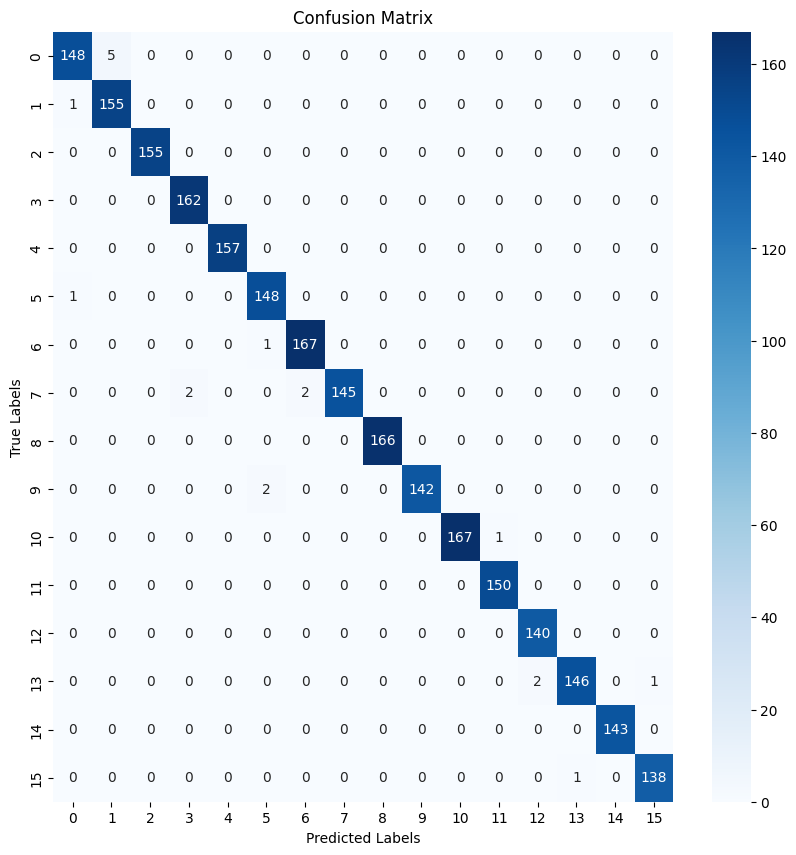

              precision    recall  f1-score   support

         0_0       0.99      0.97      0.98       153
         0_1       0.97      0.99      0.98       156
         0_2       1.00      1.00      1.00       155
         0_3       0.99      1.00      0.99       162
         1_0       1.00      1.00      1.00       157
         1_1       0.98      0.99      0.99       149
         1_2       0.99      0.99      0.99       168
         1_3       1.00      0.97      0.99       149
         2_0       1.00      1.00      1.00       166
         2_1       1.00      0.99      0.99       144
         2_2       1.00      0.99      1.00       168
         2_3       0.99      1.00      1.00       150
         3_0       0.99      1.00      0.99       140
         3_1       0.99      0.98      0.99       149
         3_2       1.00      1.00      1.00       143
         3_3       0.99      0.99      0.99       139

    accuracy                           0.99      2448
   macro avg       0.99   

In [ ]:
# Make predictions on testing set
y_pred = best_model.predict(x_test)

# Evaluate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro', zero_division = 1)
recall = recall_score(y_test, y_pred, average = 'macro', zero_division = 1)
f1 = f1_score(y_test, y_pred, average = 'macro', zero_division = 1)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion matrix: \n{confusion_mat}')
print(f'Classification report: \n{class_report}')


plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

In [ ]:
load_model = joblib.load("/content/drive/MyDrive/FYP/Models/MLP_model.h5")

# Create sample input data (should have the same number of features as the model was trained on)
title_columns = np.array([ 'Q_1.1',	'Q_1.2',	'Q_1.3',	'Q_2.1',	'Q_2.2',	'Q_2.3',	'Q_3.1', 	'Q_3.2',	'Q_3.3',	'Q_4.1',	'Q_4.2',	'Q_4.3',	'Q_5.1',	'Q_5.2',	'Q_5.3',	'Q_6.1',	'Q_6.2',	'Q_6.3',	'Q_7.1',	'Q_7.2',	'Q_7.3',	'Q_8',	'Q_8_Severity_Level',	'Q_9',	'Q_9_Severity_Level',	'Q_10.1',	'Q_10.2',	'Q_10.3',	'Q_11',	'Q_12',	'Q_13',	'Q_14.1',	'Q_14.2',	'Q_14.3',	'Q_15.1',	'Q_15.2',	'Q_15.3',	'Q_16',	'Q_16_Severity_Level', 	'Q_17.1',	'Q_17.2',	'Q_17.3',	'Q_18',	'Q_19',	'Q_20',	'Q_P_1',	'Q_P_2',	'Q_P_3',	'Q_P_4.1',	'Q_P_4.2',	'Q_P_4.3',	'Q_P_4.4',	'Q_P_5.1.1',	'Q_P_5.1.2',	'Q_P_5.1.3',	'Q_P_5.1.4'])

#input_data = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])
#input_data = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]])

input_data = np.array([[0, 0, 1,   0, 0, 1,  0, 0, 1,  0, 0, 1,  0, 0, 1,  0, 0, 1,   0, 0, 1,  0, 2,   0, 2,  0, 0, 0,  0, 0, 1,  0, 0, 0,  0, 1, 0,  0, 2,   0, 0, 1,  0, 0, 1,   1, 0, 1,   0, 0, 1, 0,   0, 0, 1, 0]])

input_data_dataset_frame = pd.DataFrame(input_data, columns = title_columns)

# Predict output for input data
output = load_model.predict(input_data_dataset_frame)
print(output)

['2_2']


# LSTM CLASSIFIER (Long Short-Term Memory) 

# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import libraries 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from google.colab import files
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame

In [ ]:
# Load the dataset
dataset_frame = pd.read_csv("/content/drive/MyDrive/FYP/Modified_Dataset.csv")

# Pre-processing data

In [ ]:
# Combine Severity_Level_1 and Severity_Level_2 columns
dataset_frame['target'] = dataset_frame['Severity_Level_1'] + "_" + dataset_frame['Severity_Level_2']

# Drop Severity_Level_1 and Severity_Level_2 columns
dataset_frame.drop(['Severity_Level_1', 'Severity_Level_2'], axis = 1, inplace = True)

categorical_columns = ['Q_8_Severity_Level', 'Q_9_Severity_Level', 'Q_16_Severity_Level', 'target']

category_mapping = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Non_Dysgraphia_Non_Dyslexia': 10,
    'Mild_Dysgraphia_Non_Dyslexia': 11,
    'Moderate_Dysgraphia_Non_Dyslexia': 12,
    'Severe_Dysgraphia_Non_Dyslexia': 13,
    'Non_Dysgraphia_Mild_Dyslexia': 14,
    'Mild_Dysgraphia_Mild_Dyslexia': 15,
    'Moderate_Dysgraphia_Mild_Dyslexia': 16,
    'Severe_Dysgraphia_Mild_Dyslexia': 17,
    'Non_Dysgraphia_Moderate_Dyslexia': 18,
    'Mild_Dysgraphia_Moderate_Dyslexia': 19,
    'Moderate_Dysgraphia_Moderate_Dyslexia': 20,
    'Severe_Dysgraphia_Moderate_Dyslexia': 21,
    'Non_Dysgraphia_Severe_Dyslexia': 22,
    'Mild_Dysgraphia_Severe_Dyslexia': 23,
    'Moderate_Dysgraphia_Severe_Dyslexia': 24,
    'Severe_Dysgraphia_Severe_Dyslexia': 25
}

for column in categorical_columns:
    dataset_frame[column] = dataset_frame[column].map(category_mapping)

# Split the dataset into training and testing sets

In [ ]:
# Split dataset into input features and target variable
x = dataset_frame.drop(['target'], axis = 1)
y = dataset_frame['target']

# Save the encoded DataFrame to a new CSV file
#dataset_frame.to_csv('LSTM_csv_file.csv', index = False)

# download the CSV file
#files.download('LSTM_csv_file.csv')

In [ ]:
# Oversample using SMOTE
smote= SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
unique_values16 = (y_resampled.astype(str)).unique()
print('Target:', unique_values16)

for value in unique_values16:
    count = ((y_resampled.astype(str)) == value).sum()
    print(value, ':', count)

Target: ['10' '13' '25' '14' '17' '15' '23' '21' '20' '19' '24' '22' '18' '16'
 '12' '11']
10 : 765
13 : 765
25 : 765
14 : 765
17 : 765
15 : 765
23 : 765
21 : 765
20 : 765
19 : 765
24 : 765
22 : 765
18 : 765
16 : 765
12 : 765
11 : 765


In [ ]:
# One-hot encode the target variable
y_resampled = to_categorical(y_resampled)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42)

# Create LSTM model

In [ ]:
# Define the model
def create_model(units = 128,  dense_units = 64, dropout_rate = 0.2, activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape = (x_resampled.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation = activation))
    model.add(Dense(y_resampled.shape[1], activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model


# Create the KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 2)

# Define the hyperparameters to search
param_grid = {
    'units': [128, 256],
    'dense_units': [64, 128],
    'batch_size': [50, 100],
    'epochs': [100, 150],
    'dropout_rate': [0.2, 0.4],
    'optimizer': ['adam'],
    'activation': ['relu']
}

# Reshape input features
x_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

# Create an EarlyStopping callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

# Create the GridSearchCV object
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose = 2)

# Fit the GridSearchCV object to the data
grid_search = grid.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [early_stop])

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

<ipython-input-16-525916383244>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 2)


Streaming output truncated to the last 5000 lines.
Epoch 122/150
66/66 - 1s - loss: 0.0368 - accuracy: 0.9876 - val_loss: 0.1673 - val_accuracy: 0.9665 - 584ms/epoch - 9ms/step
Epoch 123/150
66/66 - 1s - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.1301 - val_accuracy: 0.9726 - 621ms/epoch - 9ms/step
Epoch 124/150
66/66 - 1s - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.1032 - val_accuracy: 0.9739 - 580ms/epoch - 9ms/step
Epoch 125/150
66/66 - 1s - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0932 - val_accuracy: 0.9759 - 616ms/epoch - 9ms/step
Epoch 126/150
66/66 - 1s - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0890 - val_accuracy: 0.9767 - 641ms/epoch - 10ms/step
Epoch 127/150
66/66 - 1s - loss: 0.0192 - accuracy: 0.9962 - val_loss: 0.1117 - val_accuracy: 0.9694 - 583ms/epoch - 9ms/step
Epoch 128/150
66/66 - 1s - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.1158 - val_accuracy: 0.9730 - 573ms/epoch - 9ms/step
Epoch 129/150
66/66 - 1s - loss: 0.0204 - accuracy: 0.9942 - val_l

In [ ]:
# Train the model with the best hyperparameters
best_model = create_model(
                          units = grid_search.best_params_['units'], 
                          dropout_rate = grid_search.best_params_['dropout_rate'],
                          dense_units = grid_search.best_params_['dense_units'],
                          activation = grid_search.best_params_['activation'],
                          optimizer = grid_search.best_params_['optimizer']
                          )

# Train the model
history = best_model.fit(x_train, y_train, 
                         epochs = grid_search.best_params_['epochs'], 
                         batch_size = grid_search.best_params_['batch_size'], 
                         validation_data = (x_test, y_test), 
                         callbacks = [early_stop])

# Save the model as an h5 file
best_model.save('LSTM_model.h5')
files.download('LSTM_model.h5')

Epoch 1/150
196/196 [==============================] - 4s 11ms/step - loss: 2.8212 - accuracy: 0.0722 - val_loss: 2.7344 - val_accuracy: 0.0878
Epoch 2/150
196/196 [==============================] - 2s 8ms/step - loss: 1.7484 - accuracy: 0.3657 - val_loss: 1.2881 - val_accuracy: 0.4926
Epoch 3/150
196/196 [==============================] - 2s 8ms/step - loss: 1.2292 - accuracy: 0.5301 - val_loss: 1.1993 - val_accuracy: 0.5511
Epoch 4/150
196/196 [==============================] - 2s 9ms/step - loss: 1.0804 - accuracy: 0.5853 - val_loss: 1.0847 - val_accuracy: 0.5866
Epoch 5/150
196/196 [==============================] - 2s 10ms/step - loss: 0.9402 - accuracy: 0.6515 - val_loss: 1.0373 - val_accuracy: 0.6225
Epoch 6/150
196/196 [==============================] - 1s 7ms/step - loss: 0.7752 - accuracy: 0.7213 - val_loss: 0.7190 - val_accuracy: 0.7402
Epoch 7/150
196/196 [==============================] - 1s 7ms/step - loss: 0.6611 - accuracy: 0.7694 - val_loss: 0.6008 - val_accuracy: 0.79

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Build LSTM model
#model = Sequential()
#model.add(LSTM(128, input_shape = (x_resampled.shape[1], 1)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(y_resampled.shape[1], activation = 'softmax'))

# Compile the model
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Reshape input features
#x_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
#x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

# Create an EarlyStopping callback
#early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

# Train the model
#history = model.fit(x_train, y_train, epochs = 150, batch_size = 50, validation_data = (x_test, y_test), callbacks = [early_stop])

# Save the model as an h5 file
#model.save('LSTM_model.h5')
#files.download('LSTM_model.h5')

Epoch 1/150
245/245 [==============================] - 13s 44ms/step - loss: 1.9127 - accuracy: 0.5842 - val_loss: 3.1320 - val_accuracy: 0.1503
Epoch 2/150
245/245 [==============================] - 14s 57ms/step - loss: 1.8148 - accuracy: 0.5874 - val_loss: 3.0867 - val_accuracy: 0.1503
Epoch 3/150
245/245 [==============================] - 11s 44ms/step - loss: 1.8037 - accuracy: 0.5874 - val_loss: 3.1981 - val_accuracy: 0.1503
Epoch 4/150
245/245 [==============================] - 10s 39ms/step - loss: 1.7612 - accuracy: 0.5874 - val_loss: 3.1374 - val_accuracy: 0.1503
Epoch 5/150
245/245 [==============================] - 16s 66ms/step - loss: 1.6628 - accuracy: 0.5858 - val_loss: 3.0181 - val_accuracy: 0.1503
Epoch 6/150
245/245 [==============================] - 11s 46ms/step - loss: 1.5652 - accuracy: 0.5825 - val_loss: 2.7170 - val_accuracy: 0.1765
Epoch 7/150
245/245 [==============================] - 11s 47ms/step - loss: 1.4887 - accuracy: 0.5972 - val_loss: 2.7766 - val_ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model predictions

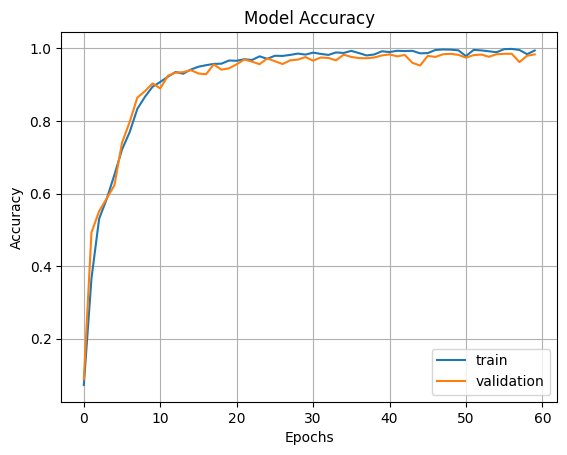

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

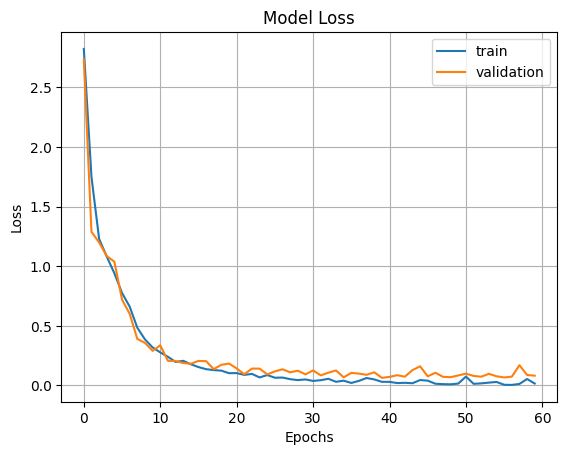

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Preprocess input record
#input_data = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])
#input_data = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]])
		
input_data = np.array([[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

# Reshape input features
input_data = input_data.reshape((input_data.shape[0], input_data.shape[1], 1))

# Predict target variable for input record
y_pred = best_model.predict(input_data)

# Get predicted class
y_pred_class = np.argmax(y_pred, axis = 1)

# Print predicted class
print(y_pred_class[0])

1/1 [==============================] - 1s 896ms/step
20


# Evaluation

77/77 [==============================] - 0s 5ms/step
Accuracy Score: 0.9836601307189542
Classification Report:               precision    recall  f1-score   support

          10       1.00      0.98      0.99       153
          11       1.00      1.00      1.00       151
          12       0.99      1.00      1.00       160
          13       1.00      0.99      1.00       156
          14       0.98      0.97      0.97       162
          15       0.96      0.99      0.98       149
          16       0.99      0.97      0.98       164
          17       0.98      0.99      0.98       144
          18       0.96      0.98      0.97       161
          19       0.99      0.97      0.98       148
          20       0.97      0.99      0.98       168
          21       0.98      0.97      0.97       147
          22       0.97      0.99      0.98       146
          23       0.99      0.97      0.98       154
          24       0.99      0.99      0.99       146
          25       1.00 

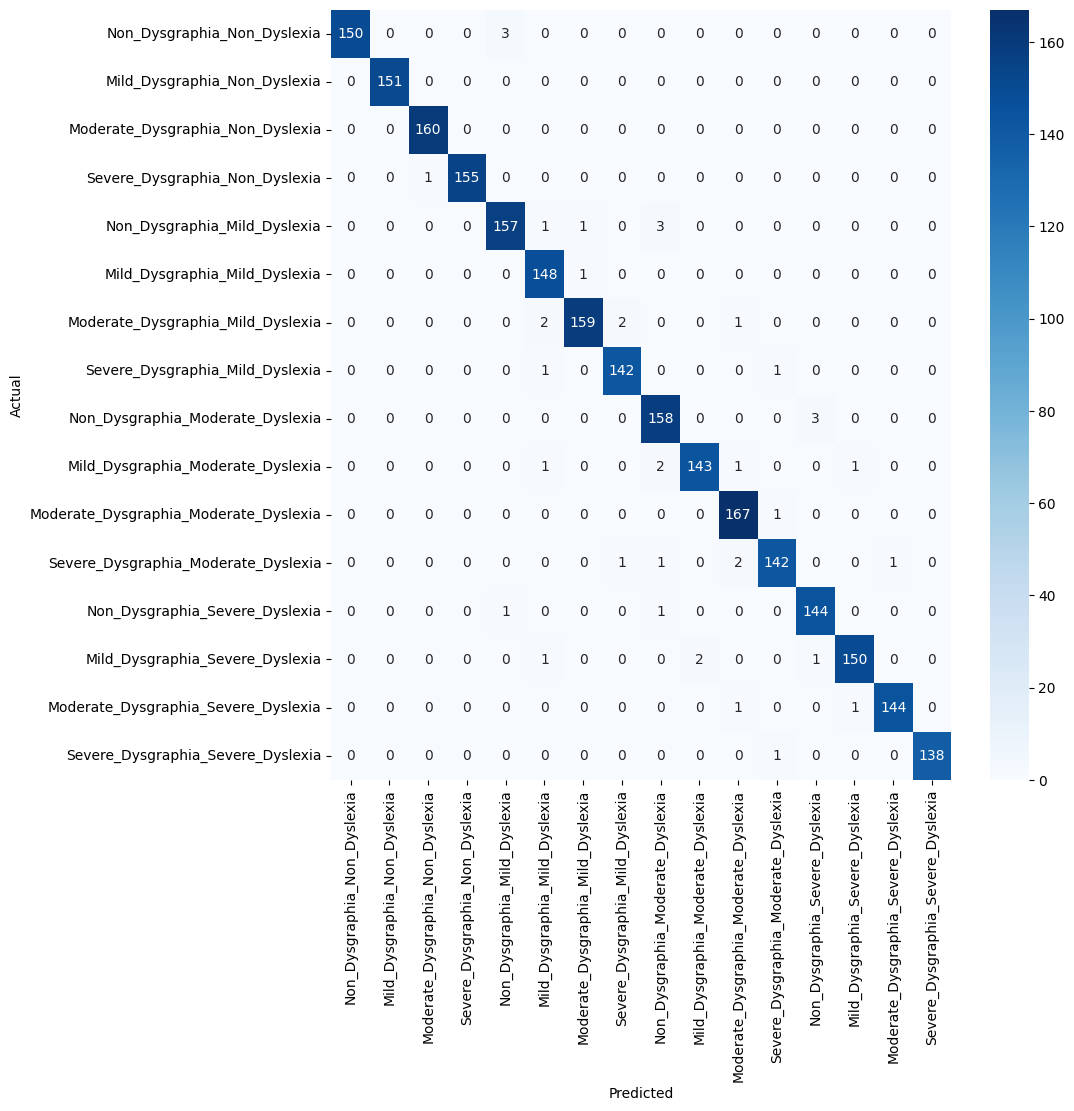

In [ ]:
# Predict target variable for test data
y_pred = best_model.predict(x_test)

# Convert predictions from one-hot encoded to class labels
y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)

# Print accuracy score
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy Score:", accuracy)

# Print classification report
class_report = classification_report(y_test_class, y_pred_class)
print("Classification Report:", class_report)

# Print confusion matrix
confusion_mat = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:", confusion_mat)

# Print precision, recall, and F1-score
precision = precision_score(y_test_class, y_pred_class, average = 'macro', zero_division = 1)
print("Precision:", precision)

recall = recall_score(y_test_class, y_pred_class, average = 'macro', zero_division = 1)
print("Recall:", recall)

f1 = f1_score(y_test_class, y_pred_class, average = 'macro', zero_division = 1)
print("F1-Score:", f1)


target_names = [ 'Non_Dysgraphia_Non_Dyslexia','Mild_Dysgraphia_Non_Dyslexia','Moderate_Dysgraphia_Non_Dyslexia','Severe_Dysgraphia_Non_Dyslexia','Non_Dysgraphia_Mild_Dyslexia','Mild_Dysgraphia_Mild_Dyslexia','Moderate_Dysgraphia_Mild_Dyslexia','Severe_Dysgraphia_Mild_Dyslexia','Non_Dysgraphia_Moderate_Dyslexia','Mild_Dysgraphia_Moderate_Dyslexia','Moderate_Dysgraphia_Moderate_Dyslexia','Severe_Dysgraphia_Moderate_Dyslexia','Non_Dysgraphia_Severe_Dyslexia','Mild_Dysgraphia_Severe_Dyslexia','Moderate_Dysgraphia_Severe_Dyslexia','Severe_Dysgraphia_Severe_Dyslexia']

# Plot confusion matrix
plt.figure(figsize = (10,10))
sns.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'g', xticklabels = target_names, yticklabels = target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM CLASSIFIER

Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/FYP/Modified_Dataset.csv")


# Join Severity_Level_1 and Severity_Level_2 columns to create target variable
data['target'] = data['Severity_Level_1'].astype(str) + '_' + data['Severity_Level_2'].astype(str)

# Encoding the target variable using LabelEncoder
le = LabelEncoder()
# Encode categorical features
categorical_cols = ['Q_8_Severity_Level', 'Q_9_Severity_Level', 'Q_16_Severity_Level', 'target']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Drop original Severity_Level columns
data.drop(['Severity_Level_1', 'Severity_Level_2'], axis=1, inplace=True)

# Split dataset into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert string values to numerical values
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.Categorical(X[col]).codes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1, gamma='auto',  probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluating the model's accuracy
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy  = svm_model.score(X_test, y_test)
print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy}')

Training accuracy: 0.994281045751634
Testing accuracy: 0.8921568627450981


Accuracy: 0.8921568627450981
Precision: 0.814916244150115
Recall: 0.8149282004545163
F1-score: 0.8029376962403114
Confusion matrix: 
[[  4   0   0   0   0   0   0   0   3   0   2   0   0   0   0   0]
 [  1   4   0   0   0   3   0   0   0   1   0   0   0   0   0   0]
 [  0   0  12   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   1   0  10   0   0   0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0  11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0  12   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   6   0   3   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0 150   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8   0   0  

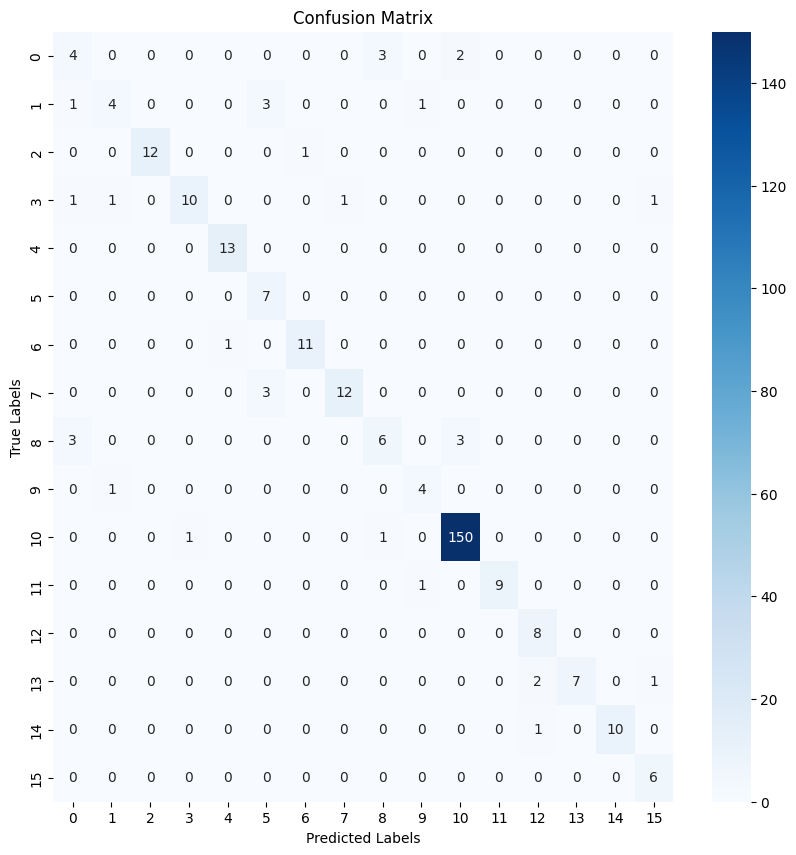

              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.67      0.44      0.53         9
           2       1.00      0.92      0.96        13
           3       0.91      0.71      0.80        14
           4       0.93      1.00      0.96        13
           5       0.54      1.00      0.70         7
           6       0.92      0.92      0.92        12
           7       0.92      0.80      0.86        15
           8       0.60      0.50      0.55        12
           9       0.67      0.80      0.73         5
          10       0.97      0.99      0.98       152
          11       1.00      0.90      0.95        10
          12       0.73      1.00      0.84         8
          13       1.00      0.70      0.82        10
          14       1.00      0.91      0.95        11
          15       0.75      1.00      0.86         6

    accuracy                           0.89       306
   macro avg       0.81   

In [ ]:
# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division = 1)
recall = recall_score(y_test, y_pred, average='macro', zero_division = 1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division = 1)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion matrix: \n{confusion_mat}')
print(f'Classification report: \n{class_report}')


plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Random Forest CLASSIFIER

Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/FYP/Modified_Dataset.csv")

# Join the Severity_Level_1 and Severity_Level_2 columns as the target variable
df['target'] = df['Severity_Level_1'] + '_' + df['Severity_Level_2']

# Encoding the target variable using LabelEncoder
le = LabelEncoder()
# Encode categorical features
categorical_cols = ['Q_8_Severity_Level', 'Q_9_Severity_Level', 'Q_16_Severity_Level', 'target']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Drop the original Severity_Level_1 and Severity_Level_2 columns
df = df.drop(['Severity_Level_1', 'Severity_Level_2'], axis=1)

# Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
history = rf.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluating the model's accuracy
train_accuracy = rf.score(X_train, y_train)
test_accuracy  = rf.score(X_test, y_test)
print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy}')

Training accuracy: 1.0
Testing accuracy: 0.8954248366013072


Accuracy: 0.8954248366013072
Precision: 0.860004959471423
Recall: 0.8040953837828838
F1-score: 0.8191717917033812
Confusion matrix: 
[[  5   0   0   1   0   0   0   0   1   0   2   0   0   0   0   0]
 [  1   7   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0  11   0   0   0   1   0   0   0   1   0   0   0   1]
 [  0   0   0   0  12   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   1   0  11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0  12   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 152   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   7   0   1  

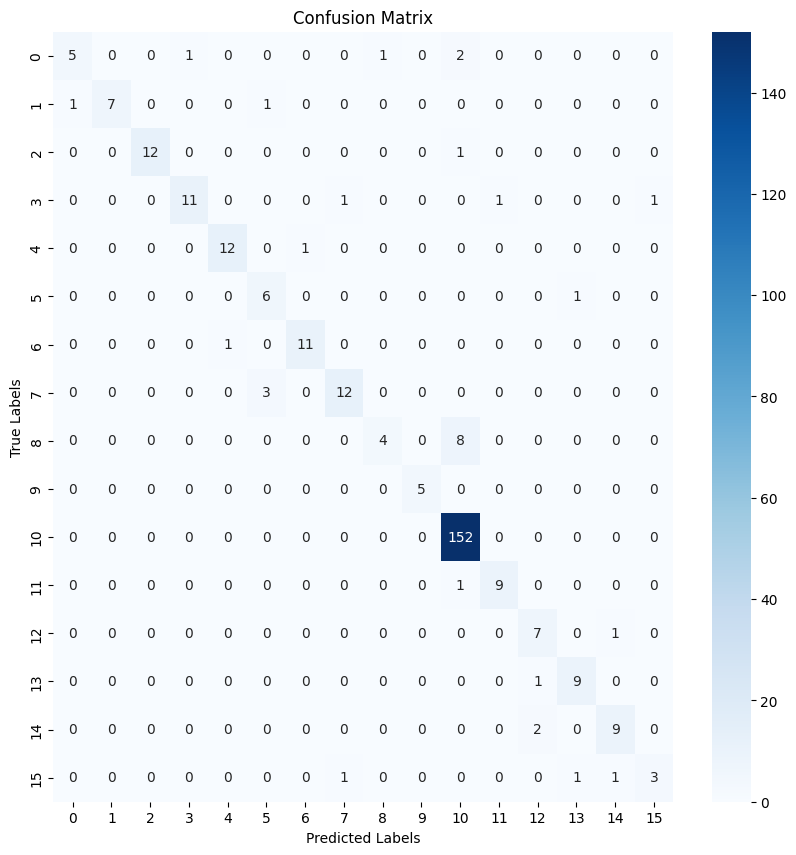

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       1.00      0.78      0.88         9
           2       1.00      0.92      0.96        13
           3       0.92      0.79      0.85        14
           4       0.92      0.92      0.92        13
           5       0.60      0.86      0.71         7
           6       0.92      0.92      0.92        12
           7       0.86      0.80      0.83        15
           8       0.80      0.33      0.47        12
           9       1.00      1.00      1.00         5
          10       0.93      1.00      0.96       152
          11       0.90      0.90      0.90        10
          12       0.70      0.88      0.78         8
          13       0.82      0.90      0.86        10
          14       0.82      0.82      0.82        11
          15       0.75      0.50      0.60         6

    accuracy                           0.90       306
   macro avg       0.86   

In [ ]:
# Make predictions on testing set
y_pred = rf.predict(X_test)

# Evaluate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division = 1)
recall = recall_score(y_test, y_pred, average='macro', zero_division = 1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division = 1)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion matrix: \n{confusion_mat}')
print(f'Classification report: \n{class_report}')


plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))